In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/Telco-Customer-Churn.csv')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,  RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, validation_curve

In [4]:
df.iloc[:,0:11].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No


In [5]:
df.iloc[:,11:].head()

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [7]:
#for col in df.columns:
#    if df[col].dtype == 'object' and (df[col].isin(['Yes', 'No', np.nan]).all() or df[col].isin(['Yes', 'No']).all()):
#        df[col] = df[col].map({'Yes': 1, 'No': 0, np.nan: np.nan})

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

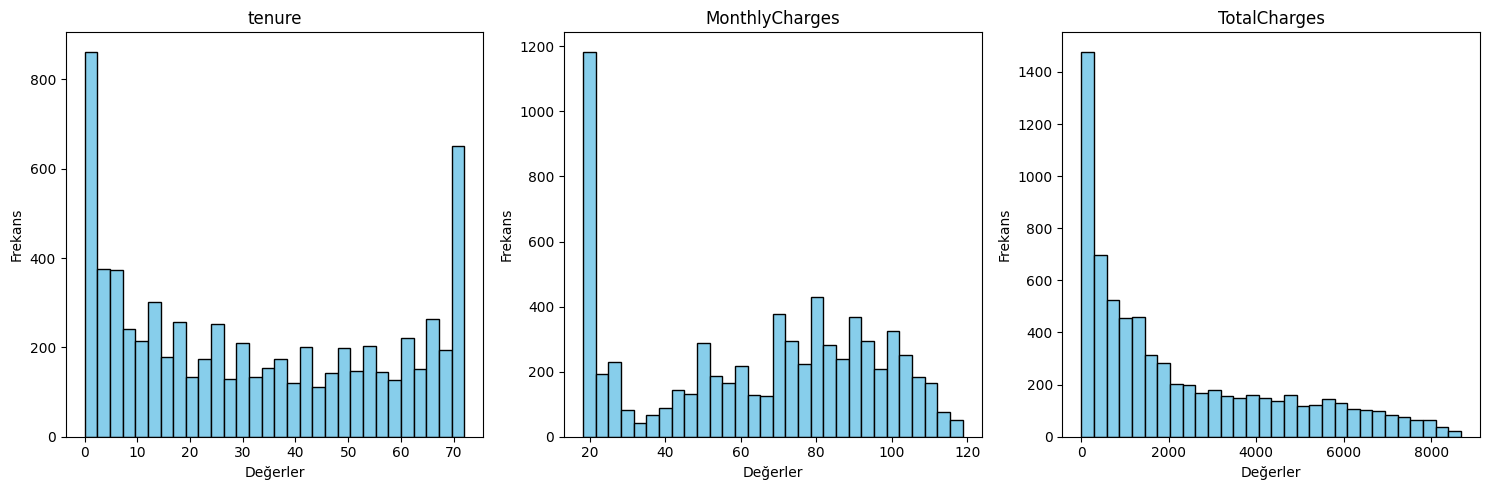

In [11]:
numeric_columns = [col for col in df.columns.drop('customerID') if df[col].nunique() > 10]

num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 5))

for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Değerler")
    axes[i].set_ylabel("Frekans")

plt.tight_layout()
plt.show()

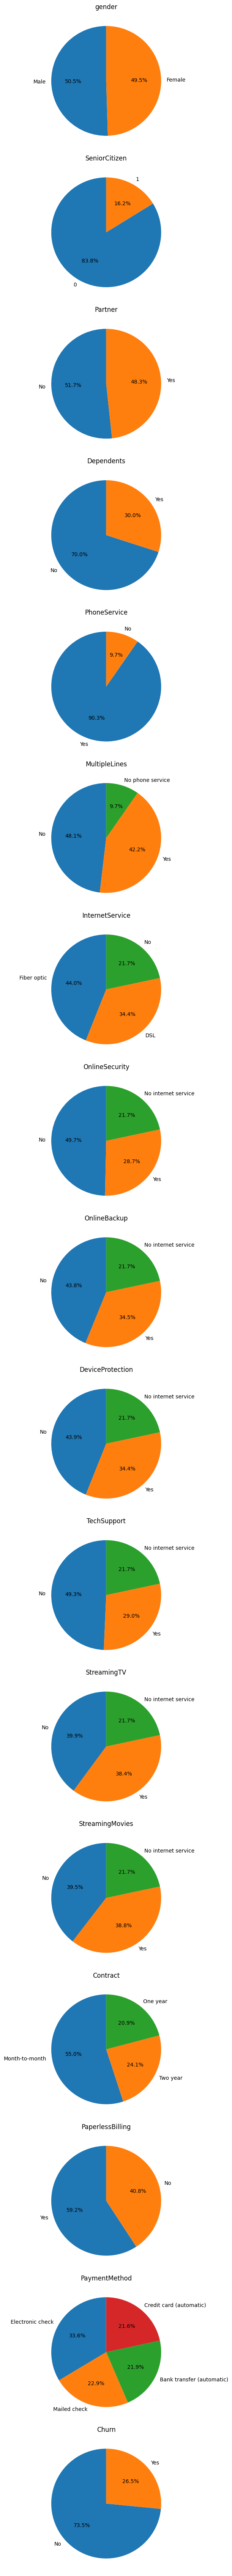

In [12]:
categorical_columns = [col for col in df.columns if df[col].nunique() < 10]

num_cols = len(categorical_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(6, 4 * num_cols))

for i, col in enumerate(categorical_columns):
    axes[i].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [13]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

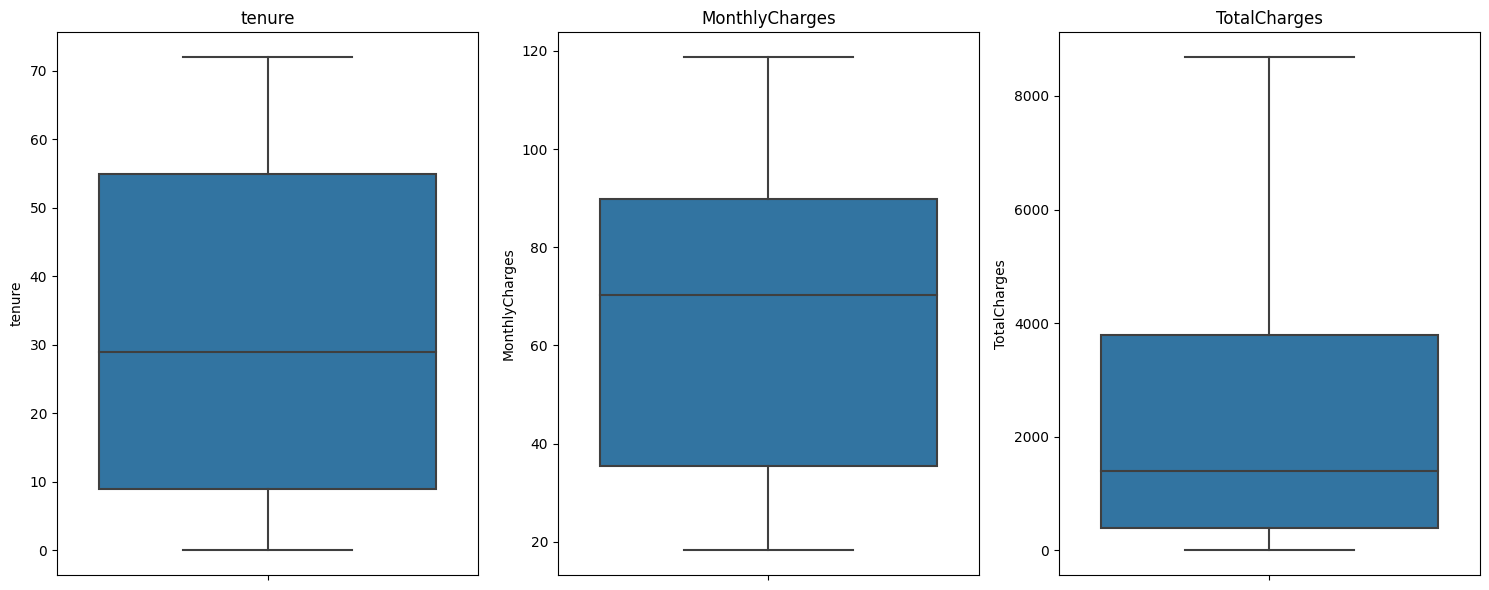

In [14]:
numeric_cols = [col for col in df.columns.drop('customerID') if df[col].nunique() > 10]

plt.figure(figsize=(15, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(data=df, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [15]:
#for col in df.columns:
#    if df[col].dtype == 'object' and df[col].isin(['Yes', 'No', np.nan]).all():
#        df[col] = df[col].map({'Yes': True, 'No': False, np.nan: np.nan}).astype(bool)

<Axes: >

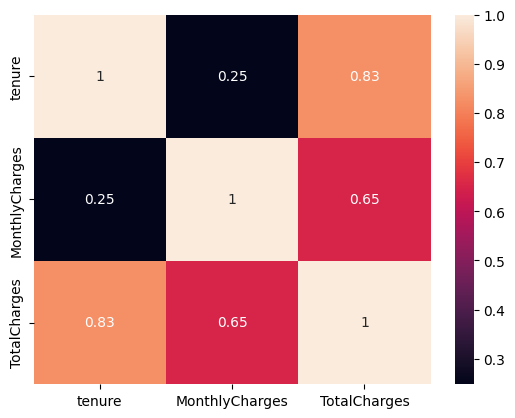

In [16]:
sns.heatmap(df[df.select_dtypes(include=['float64', 'int64']).columns.drop('SeniorCitizen')].corr(), annot = True)

In [17]:
df_dummies = pd.get_dummies(df.drop('customerID', axis = 1), drop_first=True, dtype = int)

<Axes: >

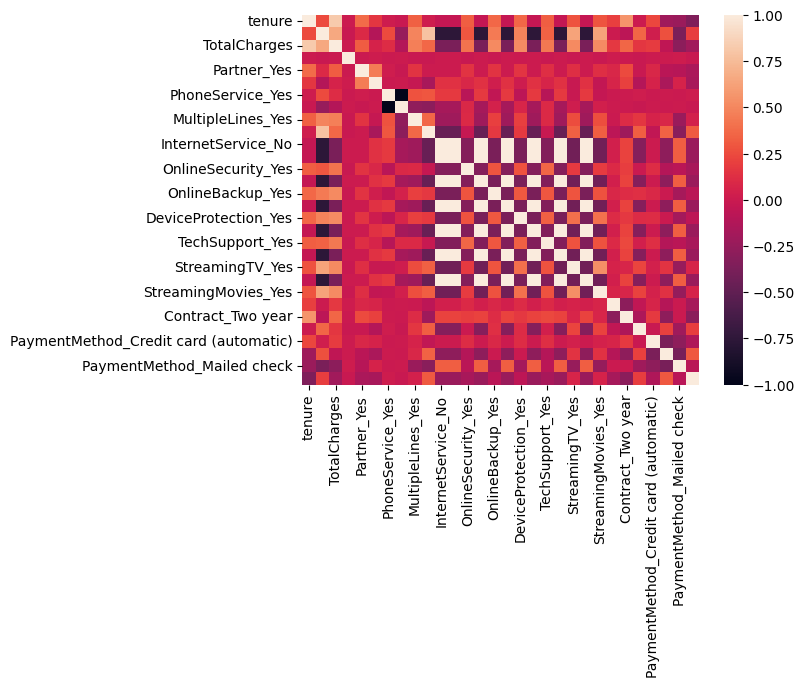

In [18]:
sns.heatmap(df_dummies[df_dummies.columns.drop('SeniorCitizen')].corr())

In [19]:
df_dummies[df_dummies.columns.drop('SeniorCitizen')].corr()['Churn_Yes']

tenure                                  -0.352229
MonthlyCharges                           0.193356
TotalCharges                            -0.198324
gender_Male                             -0.008612
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
PhoneService_Yes                         0.011942
MultipleLines_No phone service          -0.011942
MultipleLines_Yes                        0.040102
InternetService_Fiber optic              0.308020
InternetService_No                      -0.227890
OnlineSecurity_No internet service      -0.227890
OnlineSecurity_Yes                      -0.171226
OnlineBackup_No internet service        -0.227890
OnlineBackup_Yes                        -0.082255
DeviceProtection_No internet service    -0.227890
DeviceProtection_Yes                    -0.066160
TechSupport_No internet service         -0.227890
TechSupport_Yes                         -0.164674
StreamingTV_No internet service         -0.227890


In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
data = df_dummies.copy()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   int64  
 5   Partner_Yes                            7043 non-null   int64  
 6   Dependents_Yes                         7043 non-null   int64  
 7   PhoneService_Yes                       7043 non-null   int64  
 8   MultipleLines_No phone service         7043 non-null   int64  
 9   MultipleLines_Yes                      7043 non-null   int64  
 10  InternetService_Fiber optic            7043 non-null   int64  
 11  Inte

In [23]:
data[numeric_cols] = RobustScaler().fit_transform(data[numeric_cols])
data.describe().T
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-0.608696,-0.745170,-0.402798,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0.108696,-0.246550,0.146087,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,-0.586957,-0.303588,-0.379687,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,0.347826,-0.516099,0.131698,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,-0.586957,0.006440,-0.366848,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [24]:
y = data["Churn_Yes"]
X = data.drop(["Churn_Yes"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24689)

X_train.shape
X_test.shape

models = [('LR', LogisticRegression(random_state=24689, max_iter=1500)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=24689)),
          ('RF', RandomForestClassifier(random_state=24689)),
          ('XGB', XGBClassifier(random_state=24689)),
          ("LightGBM", LGBMClassifier(random_state=24689, force_col_wise=True)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=24689))]

# a list that we can store the performance results of the model
results = []

# creating a for loop on models
for model_name, model in models:
    # training the model 
    model.fit(X_train, y_train)

    # prediction on Test dataset 
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  

    # calculating the metrics 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # stroring the results 
    results.append({
        'Model':  model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    })

# converting the results' list to a dataframe 
import pandas as pd

result_df = pd.DataFrame(results)
result_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1482, number of negative: 4152
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263046 -> initscore=-1.030198
[LightGBM] [Info] Start training from score -1.030198


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,LR,0.806246,0.690000,0.534884,0.602620,0.854453
1,KNN,0.760823,0.570621,0.521964,0.545209,0.783368
2,CART,0.727466,0.504043,0.483204,0.493404,0.654010
3,RF,0.787793,0.649660,0.493540,0.560940,0.838369
4,XGB,0.789922,0.641745,0.532300,0.581921,0.839020
5,LightGBM,0.806955,0.693603,0.532300,0.602339,0.852120
6,CatBoost,0.796309,0.676056,0.496124,0.572280,0.856365
